In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

In [6]:
dataset = pd.read_csv("/Users/meenalochnegmail.com/Desktop/phishing/phishcoop.csv")
dataset.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [8]:
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [11]:
dataset.columns

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

In [15]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(x_train,y_train)
forest.fit(x_test,y_test)

/var/folders/f6/kdh1wcl97xxcz5f0p41c58vm0000gn/T/ipykernel_1051/54553995.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train)
/var/folders/f6/kdh1wcl97xxcz5f0p41c58vm0000gn/T/ipykernel_1051/54553995.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_test,y_test)


RandomForestClassifier(n_estimators=10)

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train.ravel())

#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 


Best Accurancy =0.968519265824239
best parameters ={'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}


In [24]:
#fitting RandomForest regression with best params 
rf = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
rf.fit(x_train, y_train.ravel())

RandomForestClassifier(max_features='log2', random_state=0)

In [25]:
#predicting the tests set result
y_pred = rf.predict(x_test)

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1189   60]
 [  27 1488]]


In [2]:
import pickle

In [4]:
with open ('phishing.pkl','wb')as f:
   pickle.dump(rf,f)

NameError: name 'rf' is not defined

In [22]:
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

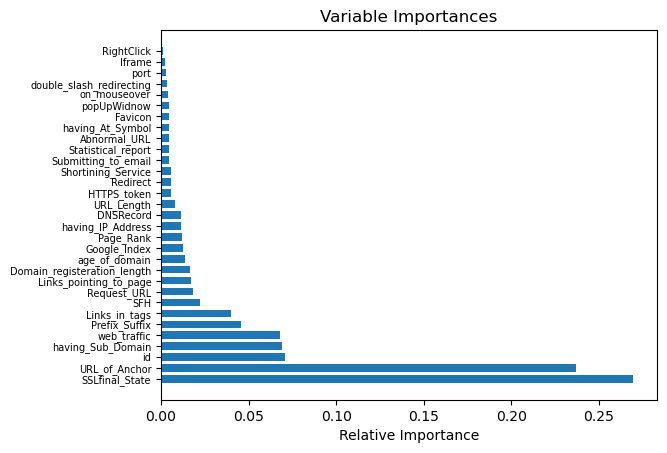

In [23]:
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()
